# Deep Learning Fundamentals

In [3]:
# Parents heights vs children heights (Galton data) (kaggle.com)
#https://www.kaggle.com/datasets/jacopoferretti/parents-heights-vs-children-heights-galton-data?resource=download
# El objetivo principal de este estudio fue establecer una relación entre la
# altura de los niños y los padres. Galton también quería saber si la selección
# del matrimonio indica una relación entre la altura del marido y la de su esposa

import pandas as pd

df = pd.read_csv('GaltonFamilies.csv')
df.head()


,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [4]:
#Any missing values?

df.isnull().sum()

rownames           0
family             0
father             0
mother             0
midparentHeight    0
children           0
childNum           0
gender             0
childHeight        0
dtype: int64

In [5]:
#Checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         934 non-null    int64  
 1   family           934 non-null    object 
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    object 
 8   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [6]:
df1 = df.copy()

#Eliminando las columnas rownames y children
df1 = df1.drop(columns=['rownames'])
df1 = df1.drop(columns=['children'])


# Eliminar las columnas family
df1 = df1.drop(columns=['family'])

# reemplazar la columna gender por números para el clasificador
df1["gender"] = df1["gender"].replace({"male": 0, "female": 1})
df1.head()


,father,mother,midparentHeight,childNum,gender,childHeight
0,78.5,67.0,75.43,1,0,73.2
1,78.5,67.0,75.43,2,1,69.2
2,78.5,67.0,75.43,3,1,69.0
3,78.5,67.0,75.43,4,1,69.0
4,75.5,66.5,73.66,1,0,73.5


In [7]:
#Any duplicate rows?
#df1 = df.copy() se comenta porque antes se hizo la copia

n_dup = len(df1) - len(df1.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

if n_dup > 0:
   # Eliminar filas duplicadas
   df = df1.drop_duplicates()
   n_dup = len(df1) - len(df1.drop_duplicates())
   print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 23
Number of duplicate rows: 23


In [8]:
# revisando cuantos valores hay por cada clase
counts = df["gender"].value_counts()
print (counts)
#plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

gender
0    463
1    448
Name: count, dtype: int64


In [9]:
dataset = df1.values
dataset

array([[78.5 , 67.  , 75.43,  1.  ,  0.  , 73.2 ],
       [78.5 , 67.  , 75.43,  2.  ,  1.  , 69.2 ],
       [78.5 , 67.  , 75.43,  3.  ,  1.  , 69.  ],
       ...,
       [62.  , 66.  , 66.64,  3.  ,  1.  , 61.  ],
       [62.5 , 63.  , 65.27,  1.  ,  0.  , 66.5 ],
       [62.5 , 63.  , 65.27,  2.  ,  1.  , 57.  ]])

In [10]:
X = dataset[:,0:5]
X

array([[78.5 , 67.  , 75.43,  1.  ,  0.  ],
       [78.5 , 67.  , 75.43,  2.  ,  1.  ],
       [78.5 , 67.  , 75.43,  3.  ,  1.  ],
       ...,
       [62.  , 66.  , 66.64,  3.  ,  1.  ],
       [62.5 , 63.  , 65.27,  1.  ,  0.  ],
       [62.5 , 63.  , 65.27,  2.  ,  1.  ]])

In [11]:
Y = dataset[:,5]
Y

array([73.2, 69.2, 69. , 69. , 73.5, 72.5, 65.5, 65.5, 71. , 68. , 70.5,
       68.5, 67. , 64.5, 63. , 72. , 69. , 68. , 66.5, 62.5, 62.5, 69.5,
       76.5, 74. , 73. , 73. , 70.5, 64. , 70.5, 68. , 66. , 66. , 65.5,
       74. , 70. , 68. , 67. , 67. , 66. , 63.5, 63. , 65. , 71. , 62. ,
       68. , 67. , 71. , 70.5, 66.7, 72. , 70.5, 70.2, 70.2, 69.2, 68.7,
       66.5, 64.5, 63.5, 74. , 73. , 71.5, 62.5, 66.5, 62.3, 66. , 64.5,
       64. , 62.7, 73.2, 73. , 72.7, 70. , 69. , 68.5, 68. , 66. , 73. ,
       68.5, 68. , 73. , 71. , 67. , 74.2, 70.5, 69.5, 66. , 65.5, 65. ,
       65. , 65.5, 66. , 63. , 70.5, 70.5, 69. , 65. , 63. , 69. , 67. ,
       63. , 73. , 67. , 70.5, 70. , 66.5, 63. , 67.5, 67.2, 66.7, 64. ,
       71. , 70. , 70. , 66. , 65. , 65. , 74. , 72. , 69. , 67.5, 63.5,
       72. , 71.5, 71.5, 70. , 68. , 65.7, 78. , 74. , 73. , 72. , 67. ,
       73.2, 73. , 69. , 67. , 70. , 67. , 67. , 66.5, 70. , 69. , 68.5,
       66. , 64.5, 63. , 71. , 67. , 76. , 72. , 71

In [12]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.        , 0.72      , 1.        , 0.        , 0.        ],
       [1.        , 0.72      , 1.        , 0.07142857, 1.        ],
       [1.        , 0.72      , 1.        , 0.14285714, 1.        ],
       ...,
       [0.        , 0.64      , 0.2030825 , 0.14285714, 1.        ],
       [0.03030303, 0.4       , 0.07887579, 0.        , 0.        ],
       [0.03030303, 0.4       , 0.07887579, 0.07142857, 1.        ]])

In [13]:
Y_scale = min_max_scaler.fit_transform(Y.reshape(-1, 1)  )
Y_scale

array([[0.74782609],
       [0.57391304],
       [0.56521739],
       [0.56521739],
       [0.76086957],
       [0.7173913 ],
       [0.41304348],
       [0.41304348],
       [0.65217391],
       [0.52173913],
       [0.63043478],
       [0.54347826],
       [0.47826087],
       [0.36956522],
       [0.30434783],
       [0.69565217],
       [0.56521739],
       [0.52173913],
       [0.45652174],
       [0.2826087 ],
       [0.2826087 ],
       [0.58695652],
       [0.89130435],
       [0.7826087 ],
       [0.73913043],
       [0.73913043],
       [0.63043478],
       [0.34782609],
       [0.63043478],
       [0.52173913],
       [0.43478261],
       [0.43478261],
       [0.41304348],
       [0.7826087 ],
       [0.60869565],
       [0.52173913],
       [0.47826087],
       [0.47826087],
       [0.43478261],
       [0.32608696],
       [0.30434783],
       [0.39130435],
       [0.65217391],
       [0.26086957],
       [0.52173913],
       [0.47826087],
       [0.65217391],
       [0.630

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)


In [15]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# Eliminar una fila específica (por ejemplo, la primera fila)
X_test = np.delete(X_test, 0, axis=0)
Y_test = np.delete(Y_test, 0, axis=0)

print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_val:", len(Y_val))
print("Longitud de Y_train:", len(Y_train))

Longitud de Y_test: 140
Longitud de Y_val: 140
Longitud de Y_train: 653


In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(653, 5) (140, 5) (140, 5) (653, 1) (140, 1) (140, 1)


### Setting up the architecture

The architecture that we want to implement is this:


- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
#Crear una instancia de MLPCLassifier
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(32, 32),
                     activation='relu',
                     solver='adam',
                     max_iter=100,
                     random_state=42,
                     verbose=True)

In [19]:
# Asegurarse de que y_train y y_test tengan la forma correcta
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

#Entrenar el modelo
model.fit(X_train, Y_train)

#Realizar predicciones del modelo en el conjunto de prueba
Y_pred = model.predict(X_test)
#print (Y_test)
#print(Y_pred)


Iteration 1, loss = 0.29492613
Iteration 2, loss = 0.23099580
Iteration 3, loss = 0.17904279
Iteration 4, loss = 0.13663661
Iteration 5, loss = 0.10365605
Iteration 6, loss = 0.07911177
Iteration 7, loss = 0.06127727
Iteration 8, loss = 0.04839393
Iteration 9, loss = 0.03886237
Iteration 10, loss = 0.03191815
Iteration 11, loss = 0.02609719
Iteration 12, loss = 0.02125991
Iteration 13, loss = 0.01755544
Iteration 14, loss = 0.01432075
Iteration 15, loss = 0.01141107
Iteration 16, loss = 0.00896861
Iteration 17, loss = 0.00710639
Iteration 18, loss = 0.00594957
Iteration 19, loss = 0.00534351
Iteration 20, loss = 0.00501222
Iteration 21, loss = 0.00489073
Iteration 22, loss = 0.00483489
Iteration 23, loss = 0.00478076
Iteration 24, loss = 0.00469196
Iteration 25, loss = 0.00459452
Iteration 26, loss = 0.00450708
Iteration 27, loss = 0.00443308
Iteration 28, loss = 0.00437224
Iteration 29, loss = 0.00433238
Iteration 30, loss = 0.00429977
Iteration 31, loss = 0.00426583
Iteration 32, los

Longitud de Y_test: 140
Longitud de Y_pred: 140
Longitud de Y_train: 653
R^2 score =  0.6404645164830989
Mean Squared Error =  0.007549688949507519
Root Mean Squared Error =  0.08688894607202644
Mean Absolute Error =  0.07008773226600086


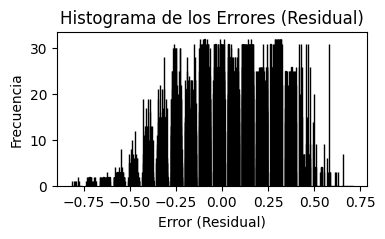

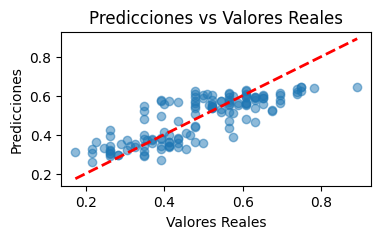

In [20]:
# Evaluar el modelo

# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Importar métricas de regresión

print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_pred:", len(Y_pred))
print("Longitud de Y_train:", len(Y_train))

# Asegurarse de que las longitudes sean iguales
assert len(Y_test) == len(Y_pred), "Las longitudes de Y_test y Y_val deben ser iguales"

#Calcula la precisión del modelo
#accuracy = accuracy_score(Y_test, Y_pred)
#print("Precisión del modelo (Accuracy):", accuracy)

# Evaluar el modelo con métricas de regresión
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(Y_test, Y_pred)

print('R^2 score = ', r2)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('Mean Absolute Error = ', mae)

# Calcular los errores (residuales)
error = Y_test - Y_val

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

In [21]:
#  sequentially (layer by layer)
#  ‘Dense’ refers to a fully-connected layer
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# ‘sgd’ refers to stochastic gradient descent
# The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
# we want to track accuracy on top of the loss function
model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
               loss = 'mean_squared_error', #mse
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=120,
          validation_data=(X_val, Y_val))

Epoch 1/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0275 - val_accuracy: 0.0071 - val_loss: 0.0285
Epoch 2/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0271 - val_accuracy: 0.0071 - val_loss: 0.0275
Epoch 3/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 9.6004e-04 - loss: 0.0265 - val_accuracy: 0.0071 - val_loss: 0.0267
Epoch 4/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 2.1024e-04 - loss: 0.0252 - val_accuracy: 0.0071 - val_loss: 0.0260
Epoch 5/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 5.3625e-04 - loss: 0.0242 - val_accuracy: 0.0071 - val_loss: 0.0253
Epoch 6/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 2.1024e-04 - loss: 0.0233 - val_accuracy: 0.0071 - val_loss: 0.0247
Epoch 7/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 2.8500e-04 - loss: 0.0225 - val_accuracy: 0.0071 - val_loss: 0.0241
Epoch 8/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0031 - loss: 0.02

In [26]:
# The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element.
#model.evaluate(X_test, Y_test)[1]

### Visualizing loss and accuracy

A good model is one where the testing and training set errors are very similar, and at their lowest point.

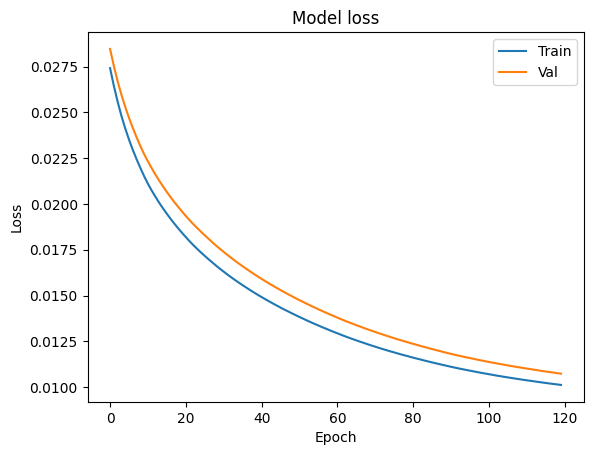

In [27]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

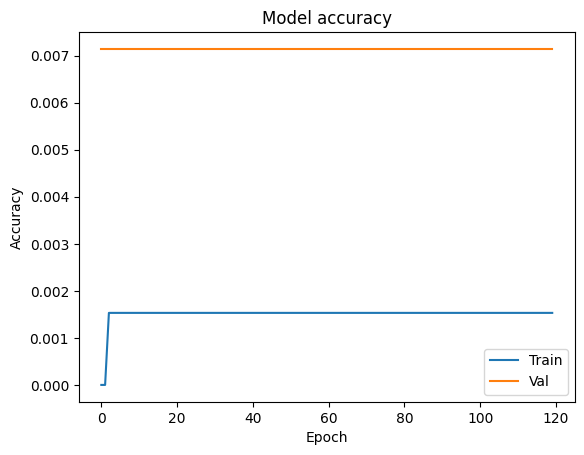

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Adding regularization to our network

Our model is overfitting. Similarly to simpler machine learning models, we can add **regularization** to our neural network to help correct this. However, the exact types of regularization are somewhat different than the ones used for our usual classification models, and go by different names:

- L2 Regularization
- Early Stopping
- Dropout




In [29]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(5,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [30]:
model_2.compile(optimizer='adam',
              loss = 'mean_squared_error', #mse
              #loss='binary_crossentropy',
              metrics=['accuracy'])


In [31]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.0000e+00 - loss: 0.0156 - val_accuracy: 0.0071 - val_loss: 0.0099
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 6.3095e-04 - loss: 0.0098 - val_accuracy: 0.0071 - val_loss: 0.0086
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 5.3625e-04 - loss: 0.0094 - val_accuracy: 0.0071 - val_loss: 0.0096
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.0052 - loss: 0.0089 - val_accuracy: 0.0071 - val_loss: 0.0086
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0011 - loss: 0.0086 - val_accuracy: 0.0071 - val_loss: 0.0077
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 6.3095e-04 - loss: 0.0071 - val_accuracy: 0.0071 - val_loss: 0.0089
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0012 - loss: 0.0075 - val_accuracy: 0.0071 - val_loss: 0.0082
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0012 - loss: 0.0080 - 

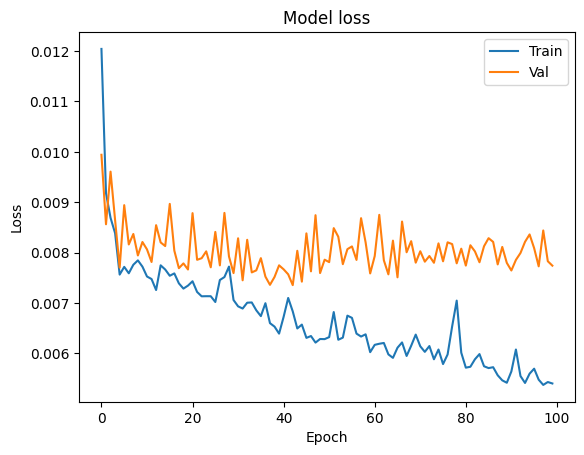

In [32]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

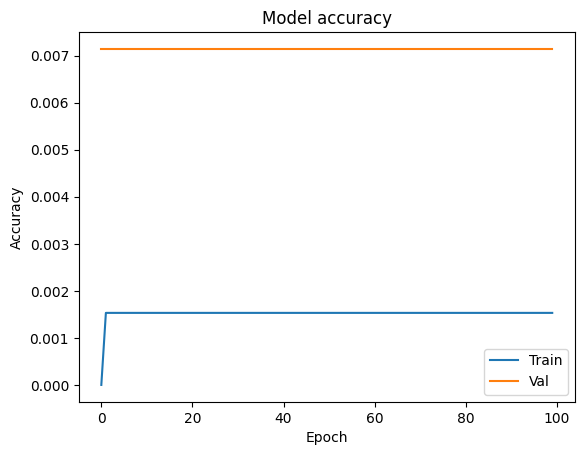

In [33]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [34]:
from keras.layers import Dropout
from keras import regularizers

In [35]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(5,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [36]:
model_3.compile(optimizer='adam',
             # loss='binary_crossentropy',
               loss = 'mean_squared_error', #mse
              metrics=['accuracy'])

In [37]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.0031 - loss: 23.0525 - val_accuracy: 0.0000e+00 - val_loss: 7.7391
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0038 - loss: 5.4710 - val_accuracy: 0.0000e+00 - val_loss: 1.2678
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.0016 - loss: 0.8289 - val_accuracy: 0.0000e+00 - val_loss: 0.1397
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 4.4747e-04 - loss: 0.0912 - val_accuracy: 0.0000e+00 - val_loss: 0.0335
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.0052 - loss: 0.0298 - val_accuracy: 0.0000e+00 - val_loss: 0.0278
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0016 - loss: 0.0251 - val_accuracy: 0.0000e+00 - val_loss: 0.0268
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 7.3241e-04 - loss: 0.0239 - val_accuracy: 0.0000e+00 - val_loss: 0.0266
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.0

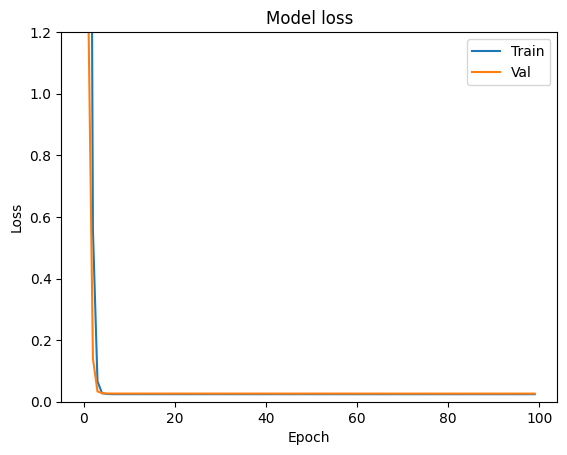

In [38]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

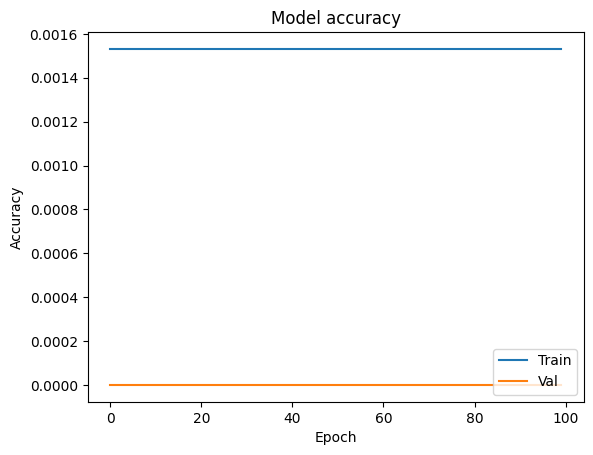

In [39]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

R^2 score =  -0.8172319759162625
Mean Squared Error =  0.03815906022144206
Root Mean Squared Error =  0.19534344171597381
Mean Absolute Error =  0.15732919254658384


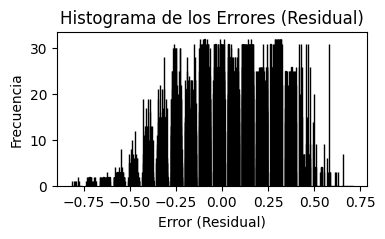

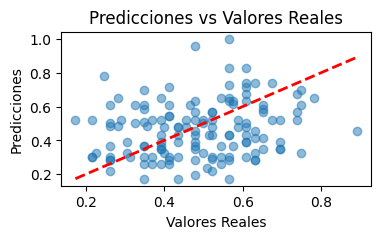

In [40]:

# Evaluar el modelo con métricas de regresión
r2 = r2_score(Y_test, Y_val)
mse = mean_squared_error(Y_test, Y_val)
rmse = mean_squared_error(Y_test, Y_val)**0.5
mae = mean_absolute_error(Y_test, Y_val)

print('R^2 score = ', r2)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('Mean Absolute Error = ', mae)

# Calcular los errores (residuales)
error = Y_test - Y_val

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(Y_test, Y_val, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

In [41]:
#Instalar scikeras si no está instalado
!pip install scikeras

Number of duplicate rows: 23
gender
0    463
1    448
Name: count, dtype: int64
Longitud de Y_test: 136
Longitud de Y_val: 137
Longitud de Y_train: 637
Longitud de X_train: 637
Longitud de y_train: 728
Longitud de X_test: 136
Longitud de y_test: 183
Dimensiones de X_train: (137, 5)
Dimensiones de y_train: (137, 1)
Dimensiones de X_test: (136, 5)
Dimensiones de y_test: (136, 1)

Iteration 1, loss = 0.29951759
Iteration 2, loss = 0.23507102
Iteration 3, loss = 0.18215844
Iteration 4, loss = 0.13916260
Iteration 5, loss = 0.10525446
Iteration 6, loss = 0.08017230
Iteration 7, loss = 0.06205998
Iteration 8, loss = 0.04859653
Iteration 9, loss = 0.03945227
Iteration 10, loss = 0.03247764
Iteration 11, loss = 0.02693809
Iteration 12, loss = 0.02239273
Iteration 13, loss = 0.01831456
Iteration 14, loss = 0.01513934
Iteration 15, loss = 0.01244406
Iteration 16, loss = 0.00997058
Iteration 17, loss = 0.00796841
Iteration 18, loss = 0.00647169
Iteration 19, loss = 0.00556092
Iteration 20, loss =

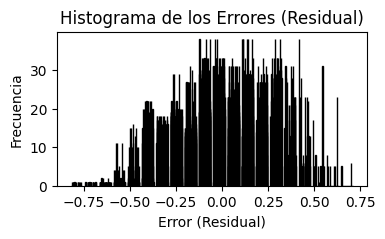

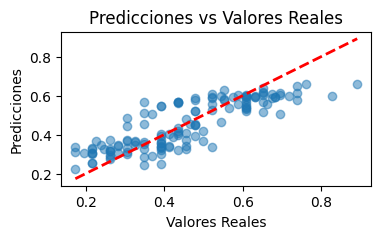

In [61]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Importar métricas de regresión

# Cargar y procesar los datos (ejemplo)
df = pd.read_csv('GaltonFamilies.csv')

#Any missing values?
df.isnull().sum()

#Checking data types
#df.info()

# Preprocesamiento de datos (ejemplo)
df1 = df.copy()
df1 = df1.drop(columns=['rownames', 'children', 'family'])
df1["gender"] = df1["gender"].replace({"male": 0, "female": 1})
#df1.head()

#Any duplicate rows?
#df1 = df.copy() se comenta porque antes se hizo la copia
#n_dup = len(df1) - len(df1.drop_duplicates())
#print(f"Number of duplicate rows: {n_dup}")

if n_dup > 0:
   # Eliminar filas duplicadas
   df2 = df1.drop_duplicates()
   n_dup = len(df1) - len(df1.drop_duplicates())
   print(f"Number of duplicate rows: {n_dup}")

# revisando cuantos valores hay por cada clase
counts = df2["gender"].value_counts()
print (counts)
#plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

# Escalar datos
dataset = df2.values
X = dataset[:,0:5]
Y = dataset[:, 5]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y.reshape(-1, 1)  )

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# Eliminar una fila específica (por ejemplo, la primera fila)
X_test = np.delete(X_test, 0, axis=0)
Y_test = np.delete(Y_test, 0, axis=0)

print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_val:", len(Y_val))
print("Longitud de Y_train:", len(Y_train))
print(f"Longitud de X_train: {len(X_train)}")
print(f"Longitud de y_train: {len(y_train)}")
print(f"Longitud de X_test: {len(X_test)}")
print(f"Longitud de y_test: {len(y_test)}")

# Ejemplo de verificación de dimensiones antes de GridSearchCV
print(f"Dimensiones de X_train: {X_val.shape}")
print(f"Dimensiones de y_train: {Y_val.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_test: {Y_test.shape}")
print()

model = MLPRegressor(hidden_layer_sizes=(32, 32),
                     activation='relu',
                     solver='adam',
                     max_iter=100,
                     random_state=42,
                     verbose=True)

# Asegurarse de que y_train y y_test tengan la forma correcta
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

#Entrenar el modelo
model.fit(X_train, Y_train)

#Realizar predicciones del modelo en el conjunto de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo



print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_pred:", len(Y_pred))
print("Longitud de Y_train:", len(Y_train))

# Asegurarse de que las longitudes sean iguales
assert len(Y_test) == len(Y_pred), "Las longitudes de Y_test y Y_val deben ser iguales"

#Calcula la precisión del modelo
#accuracy = accuracy_score(Y_test, Y_pred)
#print("Precisión del modelo (Accuracy):", accuracy)

# Evaluar el modelo con métricas de regresión
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(Y_test, Y_pred)

print('R^2 score = ', r2)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('Mean Absolute Error = ', mae)

# Calcular los errores (residuales)
error = Y_test - Y_val

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Cargar y procesar los datos (ejemplo)
df = pd.read_csv('GaltonFamilies.csv')

# Preprocesamiento de datos
df1 = df.copy()
df1 = df1.drop(columns=['rownames', 'children', 'family'])
df1["gender"] = df1["gender"].replace({"male": 0, "female": 1})

# Eliminar filas duplicadas si las hubiera
df1 = df1.drop_duplicates()

# Escalar datos
dataset = df1.values
X = dataset[:, 0:5]
Y = dataset[:, 5].astype(float)  # Asegurar que Y sea tipo float

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
Y_scale = scaler.fit_transform(Y.reshape(-1, 1)).flatten()  # Flatten para asegurar una dimensión correcta

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_scale, test_size=0.2, random_state=42)

# Definir una función para crear el modelo
def create_model(optimizer='adam', hidden_layer_sizes=(32, 32), activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], activation=activation, input_shape=(X_train.shape[1],)))
    for units in hidden_layer_sizes[1:]:
        model.add(Dense(units, activation=activation))
    model.add(Dense(1))  # Capa de salida para regresión lineal
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
    return model

# Función para evaluar el modelo con diferentes configuraciones
def evaluate_model(X_train, Y_train, X_test, Y_test, optimizer, hidden_layer_sizes, activation, epochs):
    model = create_model(optimizer=optimizer, hidden_layer_sizes=hidden_layer_sizes, activation=activation)
    model.fit(X_train, Y_train, epochs=epochs, verbose=0)
    Y_pred = model.predict(X_test).flatten()

    # Calcular métricas de evaluación
    accuracy = model.evaluate(X_test, Y_test)[1]
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)

    return optimizer, hidden_layer_sizes, activation, epochs, accuracy, r2, mse

# Definir configuraciones a probar
optimizers = ['adam', 'rmsprop', 'sgd']
hidden_layer_sizes = [(32,), (64,), (32, 32), (64, 32)]
activations = ['relu', 'sigmoid']
epochs = [20, 30, 40]

# Lista para almacenar resultados
results = []

# Iterar sobre todas las combinaciones de parámetros
for opt in optimizers:
    for hl_sizes in hidden_layer_sizes:
        for act in activations:
            for ep in epochs:
                result = evaluate_model(X_train, Y_train, X_test, Y_test, opt, hl_sizes, act, ep)
                results.append(result)

# Crear un DataFrame para visualizar los resultados
results_df = pd.DataFrame(results, columns=['Optimizer', 'Hidden Layer Sizes', 'Activation', 'Epochs', 'Accuracy', 'R2 Score', 'MSE'])
results_df.sort_values(by='MSE', ascending=True, inplace=True)  # Ordenar por MSE ascendente o la métrica que prefieras

# Mostrar tabla resumen
print("Tabla Resumen de Resultados:")
print(results_df.head(10))  # Mostrar los 10 mejores resultados

# Guardar los resultados en un archivo CSV si deseas
results_df.to_csv('results_summary.csv', index=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0089      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0095      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0092      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0094      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0095      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0094      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0088      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0101      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0025 - loss: 0.0094      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0101      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0096      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0096      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0097      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0092      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0090      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0097      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0103      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0098      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0025 - loss: 0.0092      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0092      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0100      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0025 - loss: 0.0110      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0115      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0094      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0098      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0094      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0095      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0096      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0095      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0099      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0100      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0092      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0093      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0116      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0094      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0115      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0104      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0094      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0091      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0116      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0100      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0110      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0098      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0025 - loss: 0.0091      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0093      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0177      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0098      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0107      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0115      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0105      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0096      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0134      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0025 - loss: 0.0125      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0103      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0094      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0091      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0025 - loss: 0.0095      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0148      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 0.0140      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0105      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0025 - loss: 0.0089      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0096      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0097      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0209  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0200  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0199  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0093      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0025 - loss: 0.0091      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0025 - loss: 0.0093      


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0196  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0185  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0207  
Tabla Resumen de Resultados:
   Optimizer Hidden Layer Sizes Activation  Epochs  Accuracy  R2 Score  \
0       adam              (32,)       relu      20  0.005464  0.643365   
6       adam              (64,)       relu      20  0.005464  0.639634   
31   rmsprop              (64,)       relu      30  0.005464  0.637946   
38   rmsprop           (32, 32)       relu      40  0.005464  0.636312   
14      adam           (32, 32)       relu      40  0.005464  0.632987   
19      adam           (64, 32)       relu      30  0.005464  0.632798   
3       adam              (32,)    sigmoid      20  0.005464  0.631490   
5       adam              (32,)    sigmoid      40  0.005464  0.631242   
13      adam           (32, 32)       relu      30  0.005464  0.629575   
28   rmsprop              (32,)    sigmoid      30  0.005464  0.629123   

         MSE  
0   0.008299  
6   0.00838